In [1]:
import numpy as np
import pandas as pd
import sys
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt


# calculate M for single article

In [14]:
light_dump = []
naruto = False
with open("../data/raw/lightdump/es_wiki.txt", encoding = 'utf8') as file:
    for line in file:
        if (line[0]!= "^") & naruto:
            break
        
        if line.strip() == 'Naruto':
            naruto = True
            continue
            
        if naruto:
            light_dump.append(line)

In [15]:
light_dump.reverse()
# 24400.0	Naruto

In [16]:
light_dump = [x[4:-1].split(' ') for x in light_dump]
light_dump[:45]

[['2004-04-03T13:42:17Z', '0', '1', 'Sabbut'],
 ['2004-04-03T14:09:31Z', '0', '2', 'Sabbut'],
 ['2004-04-11T23:07:42Z', '0', '3', 'Moriel'],
 ['2004-05-23T22:28:21Z', '0', '4', 'Yas'],
 ['2004-07-24T23:14:58Z', '0', '5', 'Sabbut'],
 ['2004-08-24T11:38:33Z', '0', '6', 'Sabbut'],
 ['2004-10-14T08:45:29Z', '0', '7', '80.58.15.107'],
 ['2004-10-14T15:43:35Z', '0', '8', 'Efremigio'],
 ['2004-10-18T00:41:27Z', '0', '9', '156.34.70.223'],
 ['2004-10-18T00:44:39Z', '0', '10', '156.34.70.223'],
 ['2004-10-24T12:16:40Z', '0', '11', 'Sabbut'],
 ['2004-10-24T12:21:00Z', '0', '12', 'Sabbut'],
 ['2004-10-24T12:22:08Z', '0', '13', 'Sabbut'],
 ['2004-10-24T12:23:54Z', '0', '14', 'Sabbut'],
 ['2004-10-31T07:54:05Z', '0', '15', 'Sms'],
 ['2004-11-13T01:30:17Z', '0', '16', 'Kiba'],
 ['2004-11-18T23:34:20Z', '0', '17', '80.58.3.170'],
 ['2004-12-01T00:16:56Z', '0', '18', 'Celeron'],
 ['2004-12-06T15:30:32Z', '0', '19', 'Sale'],
 ['2004-12-06T22:35:32Z', '0', '20', 'Sabbut'],
 ['2004-12-06T22:37:59Z', '0',

In [5]:
df = pd.DataFrame(data = light_dump, columns = ['time', 'revert', 'index', 'username'])
# num of edits
num_edits = df.username.value_counts()
df['num_edits'] = df.username.apply(lambda x: num_edits[x])

df.head()

,time,revert,index,username,num_edits
0,2004-04-03T13:42:17Z,0,1,Sabbut,18
1,2004-04-03T14:09:31Z,0,2,Sabbut,18
2,2004-04-11T23:07:42Z,0,3,Moriel,1
3,2004-05-23T22:28:21Z,0,4,Yas,1
4,2004-07-24T23:14:58Z,0,5,Sabbut,18


In [6]:
# find revert pairs
revert_pairs = []
revert_users = []
for idx, row in df.iterrows():
    if row['revert']=='1':
        one = row['username']
        org = df.iloc[int(row['index'])-1]
        two = org['username']
        revert_pairs.append((one, two))
        if one not in revert_users:
            revert_users.append(one)
        if two not in revert_users:
            revert_users.append(two)

In [7]:
#find mutual reverts
mutual_rev_users = []
for pair in revert_pairs:
    one = pair[0]
    two = pair[1]
    
    #mutual revert found
    if (two, one) in revert_pairs:
        mutual_rev_users.append(two)
        mutual_rev_users.append(one)

#remove duplicates, calculate num
E = len(list(set(mutual_rev_users)))
E

12

In [8]:
#calculate M
M = 0
num_edits = df.username.value_counts()
revert_pairs = list(set(revert_pairs))
for pair in revert_pairs:
    one = pair[0]
    two = pair[1]
    if num_edits[one] < num_edits[two]:
        N = num_edits[one]
    else:
        N = num_edits[two]

    M += N

M *= E
M

56100

In [9]:
# #calc M
# import sys;

# revert = 0
# revert_pairs = []

# #the list of mutual reverting pairs
# mutual_revert_pairs = []
# #the list of unique users among reverting pairs
# mutual_revert_users = []

# #a dictionary of user as key, and his number of edits as the value
# user_edits = {}

# #a dictionary with the line number (actual version number) as key, 
# #and the line label as value(i.e. line label is either the same as version number if not revert version, or equal to an older version number if it's a revert version)
# lineLabels = []

# #a dictionary with the line number (actual version number) as key, and the author of that line as value
# lineAuthors = []

# def getMutual():
#     global revert_users
#     global mutual_revert_users

#     for pair in revert_pairs:
#         parts = pair.split("~!~")
#         if parts[1] + "~!~" + parts[0] in revert_pairs:
#             sorted_pair = ""
#             if parts[0] < parts[1]:
#                 sorted_pair = parts[0] + "~!~" + parts[1]
#             else:
#                 sorted_pair = parts[1] + "~!~" + parts[0]
#             mutual_revert_pairs.append(sorted_pair)
#             if parts[1] not in mutual_revert_users:
#                 mutual_revert_users.append(parts[1])
#             if parts[0] not in mutual_revert_users:
#                 mutual_revert_users.append(parts[0])

# def printMutualPairs():
#     global mutual_revert_pairs
#     for pair in mutual_revert_pairs:
#         print(pair)

# def getLine(label):
#     global lineLabels
#     for line, ll in reversed(list(enumerate(lineLabels))):
#         if lineLabels[line] == label:
#             return line

# def readFile():
#     global user_edits
#     global revert_pairs
#     global lineLabels
#     global lineAuthors
#     global revert
#     for ln in light_dump:
#         parts = ln.strip().split(" ");

#         # number of edits per user
#         if parts[3] not in user_edits:
#             user_edits[parts[3]] = 1
#         else:
#             user_edits[parts[3]] = user_edits[parts[3]] + 1

#         # revert
#         if parts[1] == '1':
            
#             revert += 1
#             #the found line is the version i-1 equal to this version j, 
#             # and the revert is assumed to be between the author of i, and j
#             line = getLine(int(parts[2]))            
            
#             #ignore cases when i-1, and i are equal (consecutive versions)
#             if line >= len(lineLabels)-1:
#                 continue
#             revertedU = lineAuthors[line + 1]
#             revertingU = parts[3]
#             if revertedU == revertingU:
#                 continue
#             pair = revertedU + "~!~" + revertingU
#             if pair not in revert_pairs:
#                 revert_pairs.append(pair)
#         lineLabels.append(int(parts[2]))
#         lineAuthors.append(parts[3])

# #main part
# readFile()
# # number of reverts
# # print revert

# #calculating the score
# getMutual()
# score = 0
# for pair in list(set(mutual_revert_pairs)):
#     parts = pair.split("~!~")
#     u1 = parts[0]
#     u2 = parts[1]
#     if user_edits[u1]<user_edits[u2]:
#         edit_min = user_edits[u1]
#     else:
#         edit_min = user_edits[u2]
# #     print(pair + ":" + str(edit_min))
#     score += edit_min

# score *= len(mutual_revert_users)    
# print(score)

# EDA on light dump

In [10]:
light_dump = {}
with open("../data/lightdump/simple_wiki.txt", encoding = 'utf8') as file:
    for line in file:
        # title
        if line[0]!= "^":
            title = line
            continue
            
        # data
        if line[0] == "^":
            if title in light_dump:
                light_dump[title].append(line)
            else:
                light_dump[title] = [line]

In [11]:
df = pd.DataFrame(columns = ['time', 'revert', 'index', 'username', 'title'])

counter = 0
for key in light_dump:
    counter += 1
    data = [x[4:-1].split(" ") for x in light_dump[key]]
    chunk = pd.DataFrame(data = data, columns = ['time', 'revert', 'index', 'username'])
    chunk['title'] = key.replace(" ", "").replace("\n", "")
    df = pd.concat([df, chunk])
    if counter == 10000:
        break
    
df.head()

,time,revert,index,username,title
0,2011-10-28T12:51:21Z,0,2,MystBot,Herbert_Art_Gallery_and_Museum
1,2011-10-28T12:28:07Z,0,1,Rock_drum,Herbert_Art_Gallery_and_Museum
0,2011-10-28T08:32:39Z,0,7,DJDunsie,Waiting_to_Exhale
1,2011-10-28T08:32:21Z,0,6,DJDunsie,Waiting_to_Exhale
2,2011-10-28T08:31:56Z,0,5,DJDunsie,Waiting_to_Exhale


In [12]:
df.time = pd.to_datetime(df.time)
df.revert = df.revert.astype(int)
df['index'] = df.index.astype(int)
df.head()

,time,revert,index,username,title
0,2011-10-28 12:51:21+00:00,0,0,MystBot,Herbert_Art_Gallery_and_Museum
1,2011-10-28 12:28:07+00:00,0,1,Rock_drum,Herbert_Art_Gallery_and_Museum
0,2011-10-28 08:32:39+00:00,0,0,DJDunsie,Waiting_to_Exhale
1,2011-10-28 08:32:21+00:00,0,1,DJDunsie,Waiting_to_Exhale
2,2011-10-28 08:31:56+00:00,0,2,DJDunsie,Waiting_to_Exhale


In [13]:
df.revert.value_counts(normalize = True)

0    0.94831
1    0.05169
Name: revert, dtype: float64

In [14]:
df[df.revert == 1].username.value_counts()[:10]

Djsasso            213
GoblinBot4         124
Barliner           121
Peterdownunder     111
SEPTActaMTA8235     73
Auntof6             70
Kansan              67
Kueller1            66
72.88.61.80         65
Pmlineditor         62
Name: username, dtype: int64

In [15]:
df[df.revert == 0].username.value_counts()[:10]

Luckas-bot        5246
ArthurBot         4818
Auntof6           3226
Macdonald-ross    2455
EmausBot          1984
Barliner          1973
Peterdownunder    1920
KingRaven44       1565
ZéroBot           1425
DMighton          1398
Name: username, dtype: int64

In [86]:
df.title.value_counts()[-9700:]

San_Fernando,_Chile             27
List_of_subcamps_of_Stutthof    27
Over_the_Limit_(2011)           27
Pope_Leo_X                      27
Yoü_and_I                       27
                                ..
Christmas_at_Ground_Zero         2
Nelson_Frazier,_Jr.              2
Nitrogen_group                   2
Jeweller                         2
Peter_Leko                       2
Name: title, Length: 9700, dtype: int64

0.16599516518936341


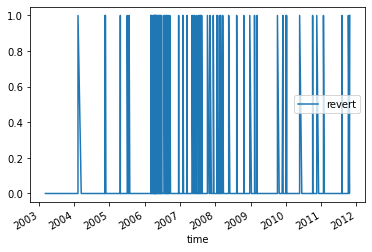

In [93]:
#158 reverts
many = df[df.title == 'Zacarias_Moussaoui']
print(many.revert.sum() / len(many.revert))

many.plot(x = 'time', y = 'revert')

0.23730569948186528


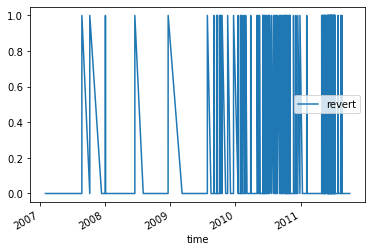

In [90]:
#little reverts
little = df[df.title == 'Bella_Thorne']
print(little.revert.sum() / len(little.revert))
little.plot(x = 'time', y='revert')

0.14285714285714285


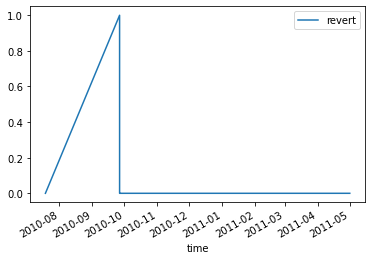

In [91]:
#little reverts
little = df[df.title == 'Centenary_Medal']
print(little.revert.sum() / len(little.revert))

little.plot(x = 'time', y='revert')

0.037037037037037035


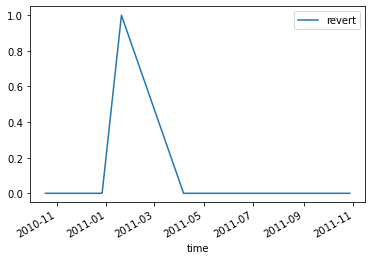

In [92]:
#little reverts
little = df[df.title == 'Pope_Leo_X']
print(little.revert.sum() / len(little.revert))
little.plot(x = 'time', y='revert')

# participation 3

In [95]:
content_2 = []
with open("../data/testdata/en_wiki_test.txt", encoding = 'utf8') as file:
    
    content_2 = file.readlines()
#     content_2 = "".join(content_2)
#     light_dump = BeautifulSoup(content_2, "xml")


In [91]:
# wikidump data
revision = wiki_data.find_all("revision")

timestamp = [x.timestamp for x in revision]
comment = [x.comment for x in revision]
username = [x.username for x in revision]

d = {'timestamp': timestamp, 'comment': comment, 'username': username}
df = pd.DataFrame(data = d)

revert = [("revert" in str(x).lower()) for x in comment]
revert = [1 if x== True else 0 for x in revert]

df['revert'] = revert
df.head()

,timestamp,comment,username,revert
0,[2002-02-21T15:11:49Z],[*],[David Parker],0
1,[2002-02-21T15:14:16Z],[remove self-link; some other editing],[Vicki Rosenzweig],0
2,[2002-02-21T16:06:19Z],[*],[David Parker],0
3,[2002-02-24T08:19:24Z],"[Oops! Richard I, not a Robert! And it was mor...",[David Parker],0
4,[2002-02-25T15:51:15Z],[*],[David Parker],0


In [111]:
light_dump = [x for x in content_2 if "^^^" in x]
light_dump[:5]

print(light_dump[0])
light_timestamp = [x[4:24] for x in light_dump]

light_timestamp[:5]

^^^_2009-12-16T02:31:41Z 0 267 128.205.63.225



['2009-12-16T02:31:41Z',
 '2009-12-02T18:08:00Z',
 '2009-12-02T13:55:48Z',
 '2009-11-28T18:33:42Z',
 '2009-11-23T23:14:17Z']

In [131]:
light_timestamp[0]

'2009-12-16T02:31:41Z'

In [135]:
str(timestamp[0]).replace("<timestamp>", "").replace("</timestamp>", "")

'2002-02-21T15:11:49Z'

In [136]:
in_light = [True if str(x).replace("<timestamp>", "").replace("</timestamp>", "") in light_timestamp else False for x in timestamp]
n_light = [1 if x== True else 0 for x in in_light]

df['in_light'] = in_light
df.head()

,timestamp,comment,username,revert,in_light
0,[2002-02-21T15:11:49Z],[*],[David Parker],0,True
1,[2002-02-21T15:14:16Z],[remove self-link; some other editing],[Vicki Rosenzweig],0,True
2,[2002-02-21T16:06:19Z],[*],[David Parker],0,True
3,[2002-02-24T08:19:24Z],"[Oops! Richard I, not a Robert! And it was mor...",[David Parker],0,True
4,[2002-02-25T15:51:15Z],[*],[David Parker],0,True


In [137]:
sum((df.revert == 1) & (df.in_light == 1))

34